# Prophet 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

## Basic forecasting with Prophet 

Source of data: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [115]:
df = pd.read_csv('data/household_power_consumption.csv')

df.head()

,datetime,Global_active_power
0,2006-12-16 18:00:00,217.932
1,2006-12-16 19:00:00,204.014
2,2006-12-16 20:00:00,196.114
3,2006-12-16 21:00:00,183.388
4,2006-12-16 22:00:00,132.008


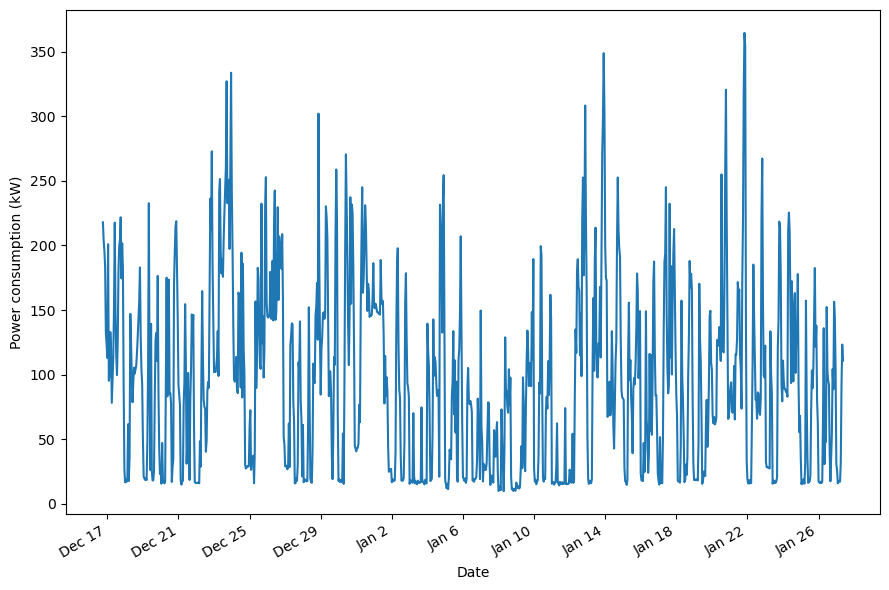

In [120]:
fig, ax = plt.subplots()

ax.plot(df['Global_active_power'])
ax.set_xlabel('Date')
ax.set_ylabel('Power consumption (kW)')

plt.xticks(np.arange(6, 999, 96), ['Dec 17', 'Dec 21', 'Dec 25', 'Dec 29', 'Jan 2', 'Jan 6', 'Jan 10', 'Jan 14', 'Jan 18', 'Jan 22', 'Jan 26'])

fig.autofmt_xdate()
plt.tight_layout()

### Rename columns appropriately 

In [121]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2006-12-16 18:00:00,217.932
1,2006-12-16 19:00:00,204.014
2,2006-12-16 20:00:00,196.114
3,2006-12-16 21:00:00,183.388
4,2006-12-16 22:00:00,132.008


### Train/test split 

In [122]:
train = df[:-168]
test = df[-168:]

### Initialize model and fit 

In [123]:
m = Prophet()
m.fit(train);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


### Make *future* DataFrame 

In [124]:
future = m.make_future_dataframe(periods=168, freq='H')

### Forecast 

In [125]:
future.tail()

,ds
995,2007-01-27 05:00:00
996,2007-01-27 06:00:00
997,2007-01-27 07:00:00
998,2007-01-27 08:00:00
999,2007-01-27 09:00:00


In [126]:
forecast = m.predict(future)

In [127]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
995,2007-01-27 05:00:00,107.913043,17.420106,163.476302,104.151519,111.316948,-17.753152,-17.753152,-17.753152,-45.401244,-45.401244,-45.401244,27.648092,27.648092,27.648092,0.0,0.0,0.0,90.159891
996,2007-01-27 06:00:00,107.984131,40.822492,182.496589,104.171972,111.423153,2.986968,2.986968,2.986968,-26.346295,-26.346295,-26.346295,29.333264,29.333264,29.333264,0.0,0.0,0.0,110.971099
997,2007-01-27 07:00:00,108.055219,63.280551,209.501810,104.188245,111.528737,31.583370,31.583370,31.583370,0.636855,0.636855,0.636855,30.946515,30.946515,30.946515,0.0,0.0,0.0,139.638589
998,2007-01-27 08:00:00,108.126307,87.154659,235.980393,104.227948,111.634321,56.993355,56.993355,56.993355,24.517050,24.517050,24.517050,32.476305,32.476305,32.476305,0.0,0.0,0.0,165.119662
999,2007-01-27 09:00:00,108.197396,104.161314,249.521413,104.253458,111.739904,68.024748,68.024748,68.024748,34.113344,34.113344,34.113344,33.911404,33.911404,33.911404,0.0,0.0,0.0,176.222143


### Evaluate against a baseline

In [128]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]

test.head()

,ds,y,yhat,yhat_lower,yhat_upper
832,2007-01-20 10:00:00,136.784,157.892191,85.750556,230.484064
833,2007-01-20 11:00:00,124.536,141.260796,66.101216,215.016228
834,2007-01-20 12:00:00,110.588,126.329311,54.480478,199.627518
835,2007-01-20 13:00:00,255.062,121.205245,54.169271,196.128639
836,2007-01-20 14:00:00,158.022,125.995712,49.565429,201.788813


In [129]:
test['baseline'] = train['y'][-168:].values

test.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
832,2007-01-20 10:00:00,136.784,157.892191,85.750556,230.484064,190.202
833,2007-01-20 11:00:00,124.536,141.260796,66.101216,215.016228,213.784
834,2007-01-20 12:00:00,110.588,126.329311,54.480478,199.627518,118.210
835,2007-01-20 13:00:00,255.062,121.205245,54.169271,196.128639,98.352
836,2007-01-20 14:00:00,158.022,125.995712,49.565429,201.788813,97.782


In [130]:
from sklearn.metrics import mean_absolute_error

prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])

print(prophet_mae)
print(baseline_mae)

44.99697653367077
47.146928571428575


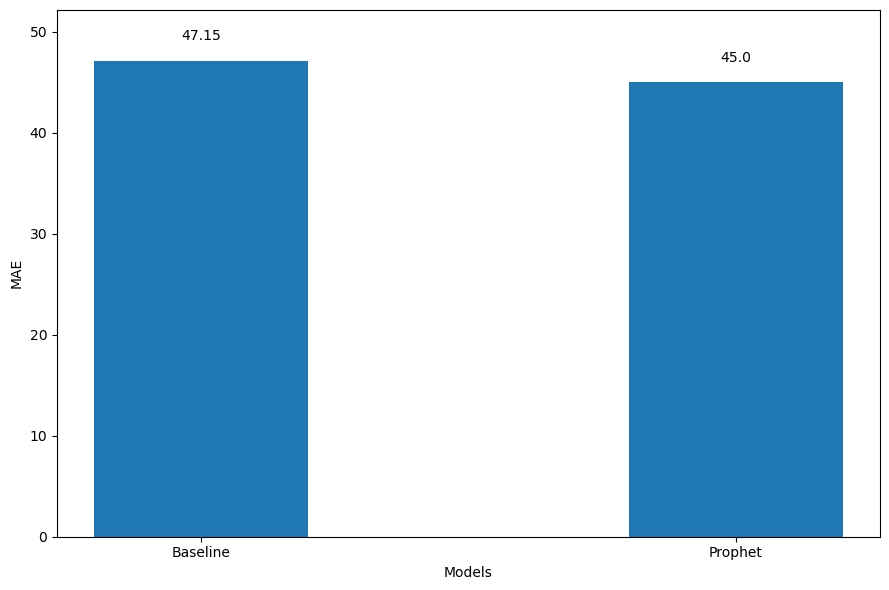

In [131]:
fig, ax = plt.subplots()

x = ['Baseline', 'Prophet']
y = [baseline_mae, prophet_mae]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_ylim(0, max(y) + 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 2, s=str(round(value,2)), ha='center')

plt.tight_layout()

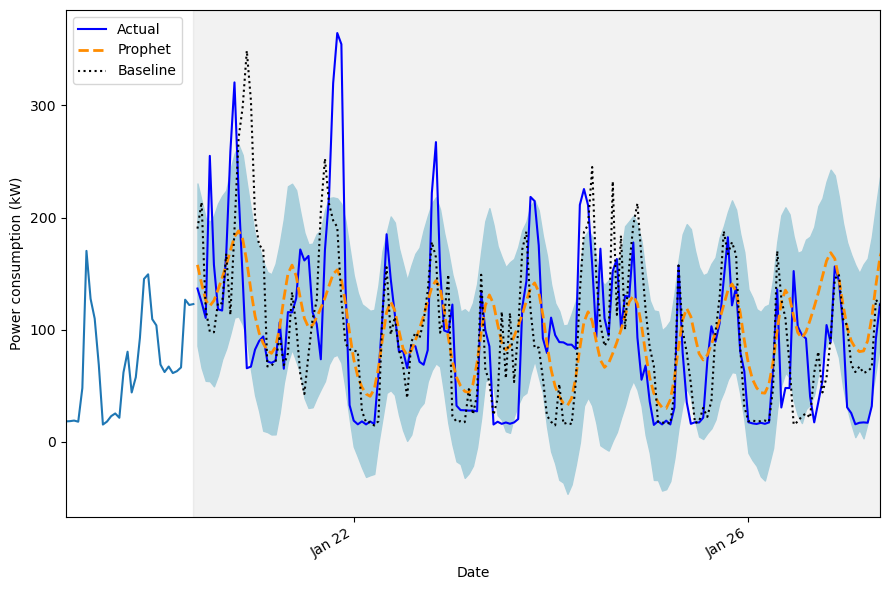

In [132]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=2, label='Prophet')
ax.plot(test['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('Power consumption (kW)')

ax.axvspan(831, 998, color='#808080', alpha=0.1)

ax.legend(loc='best')

plt.xticks(np.arange(6, 999, 96), ['Dec 17', 'Dec 21', 'Dec 25', 'Dec 29', 'Jan 2', 'Jan 6', 'Jan 10', 'Jan 14', 'Jan 18', 'Jan 22', 'Jan 26'])

plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')

plt.xlim(800, 998)

fig.autofmt_xdate()
plt.tight_layout()

## Prophet's advanced functionalities 

### Visualizations 

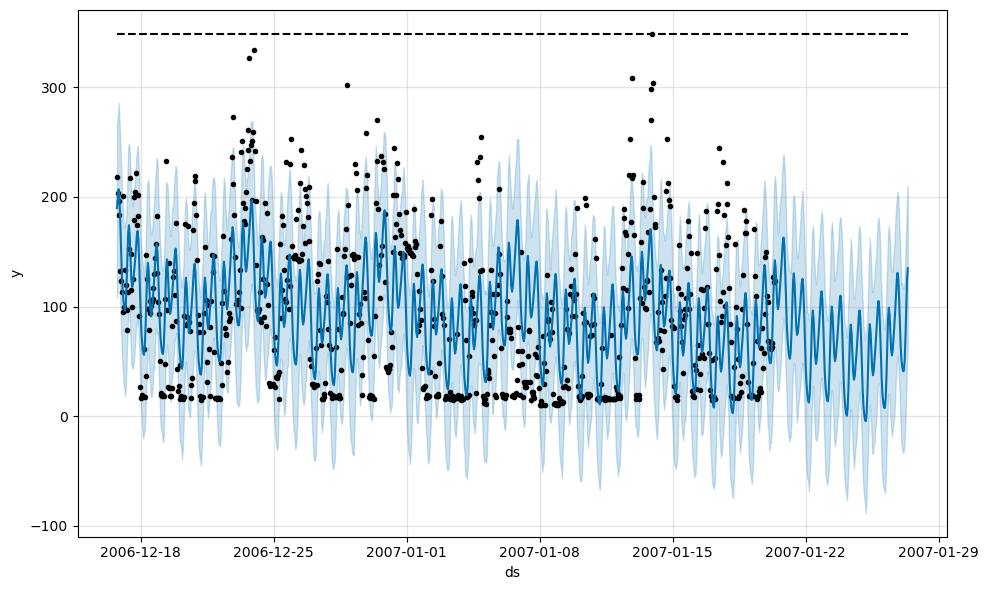

In [147]:
fig1 = m.plot(forecast)

#### Plot components 

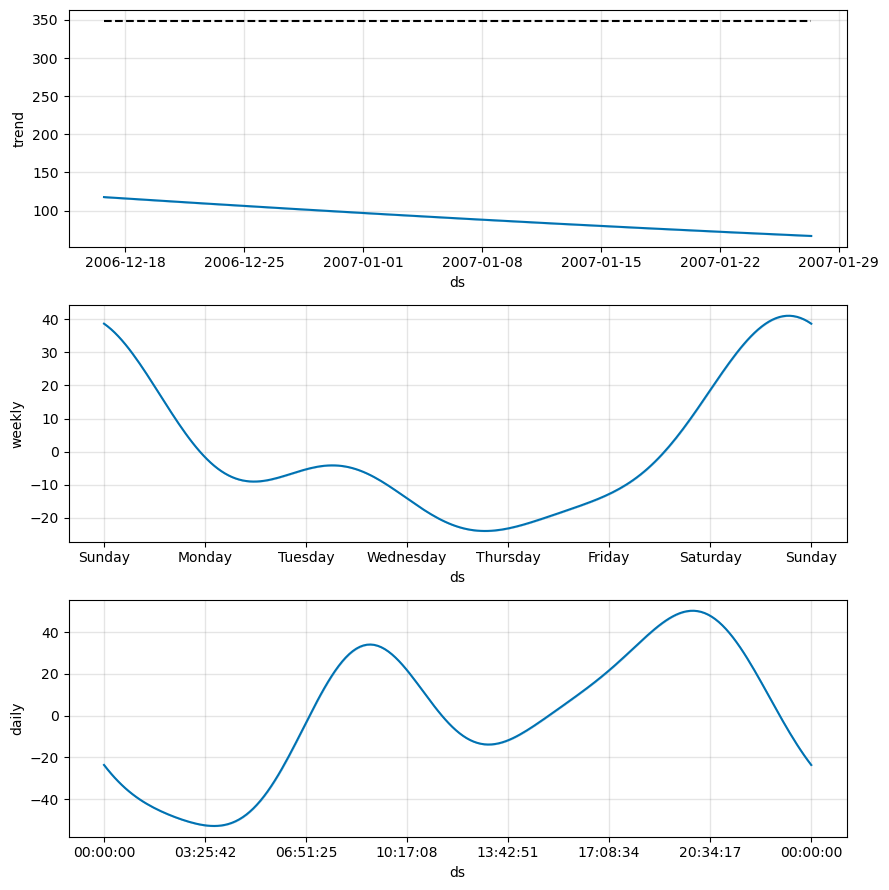

In [148]:
fig2 = m.plot_components(forecast)

#### Show trend changepoints 

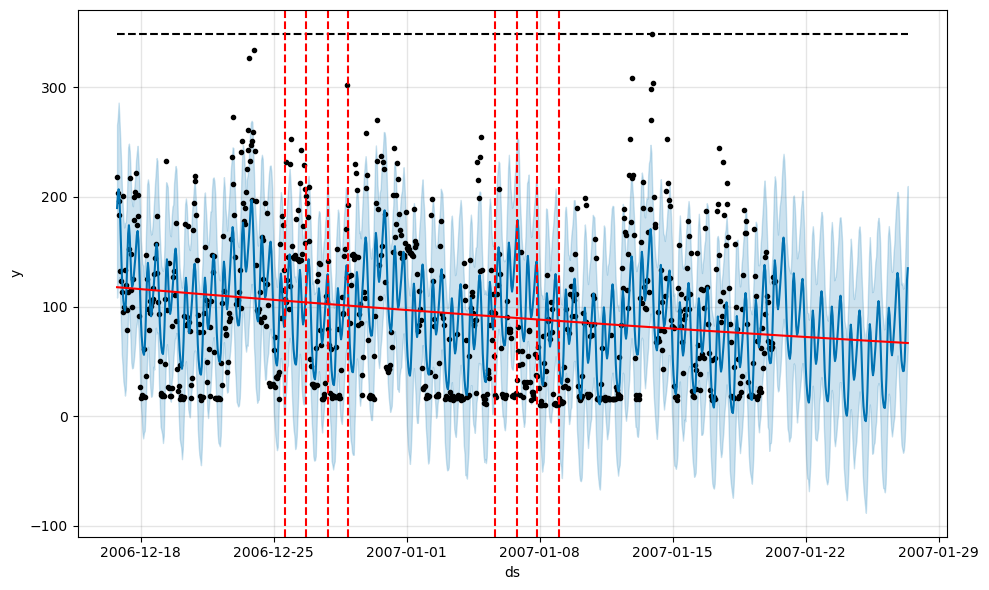

In [149]:
from fbprophet.plot import add_changepoints_to_plot

fig3 = m.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), m, forecast)

#### Plot seasonal components separately 

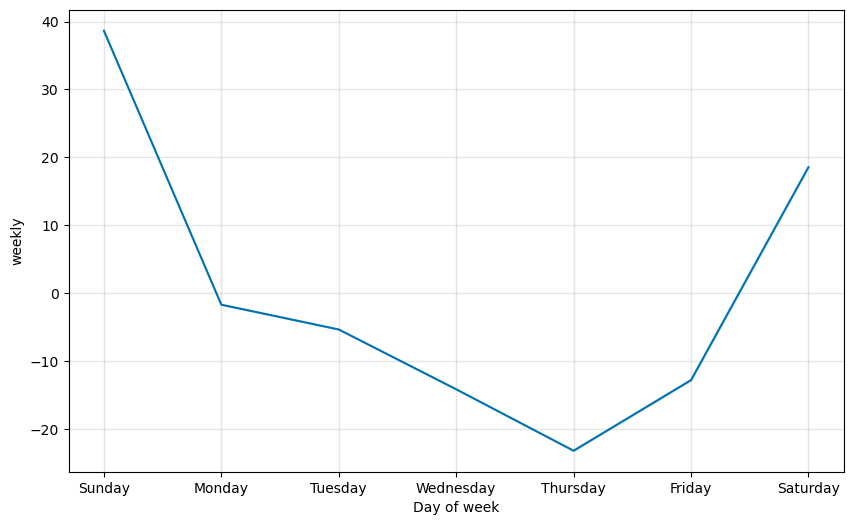

In [152]:
from fbprophet.plot import plot_yearly, plot_weekly

fig4 = plot_weekly(m)

#### Tune seasonality's sensitivity 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


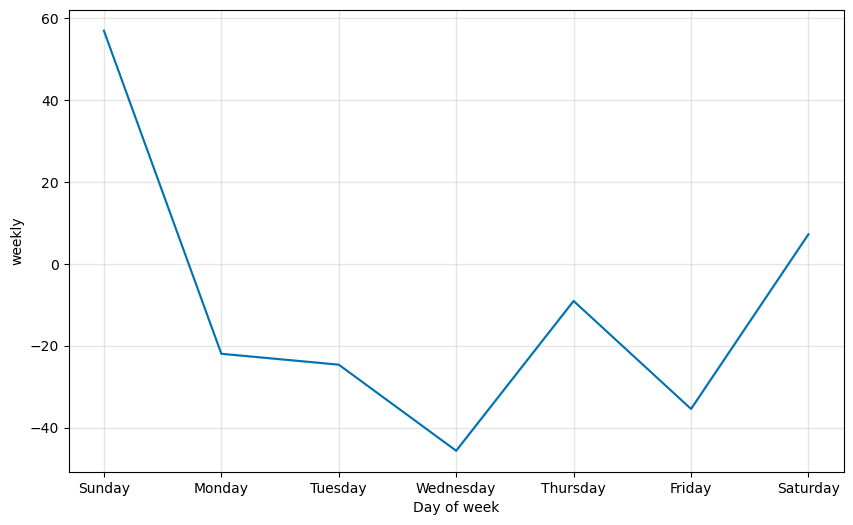

In [153]:
m2 = Prophet(weekly_seasonality=20).fit(train)

fig6 = plot_weekly(m2)

### Cross-validation and performance metrics 

In [154]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='504 hours', period='84 hours', horizon='168 hours', parallel='processes')

df_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2007-01-09 21:00:00 and 2007-01-13 09:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000261ADCEA408>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2007-01-09 22:00:00,30.791483,-39.669384,101.121873,111.454,2007-01-09 21:00:00
1,2007-01-09 23:00:00,3.154167,-72.935093,75.826564,189.508,2007-01-09 21:00:00
2,2007-01-10 00:00:00,-17.338837,-86.357982,47.666596,27.360,2007-01-09 21:00:00
3,2007-01-10 01:00:00,-28.503568,-98.573743,42.724526,17.178,2007-01-09 21:00:00
4,2007-01-10 02:00:00,-34.885522,-104.514087,33.177510,18.650,2007-01-09 21:00:00


In [155]:
from fbprophet.diagnostics import performance_metrics

df_perf = performance_metrics(df_cv, rolling_window=0)

df_perf.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 01:00:00,5560.639461,74.569695,74.297555,0.540445,0.540445,0.5
1,0 days 02:00:00,23096.692822,151.975961,146.715768,0.742112,0.742112,0.0
2,0 days 03:00:00,1361.724297,36.901549,35.816625,0.930791,0.930791,1.0
3,0 days 04:00:00,1151.885938,33.939445,30.205670,1.404536,1.404536,1.0
4,0 days 05:00:00,1522.095570,39.014043,33.441198,1.503517,1.503517,1.0


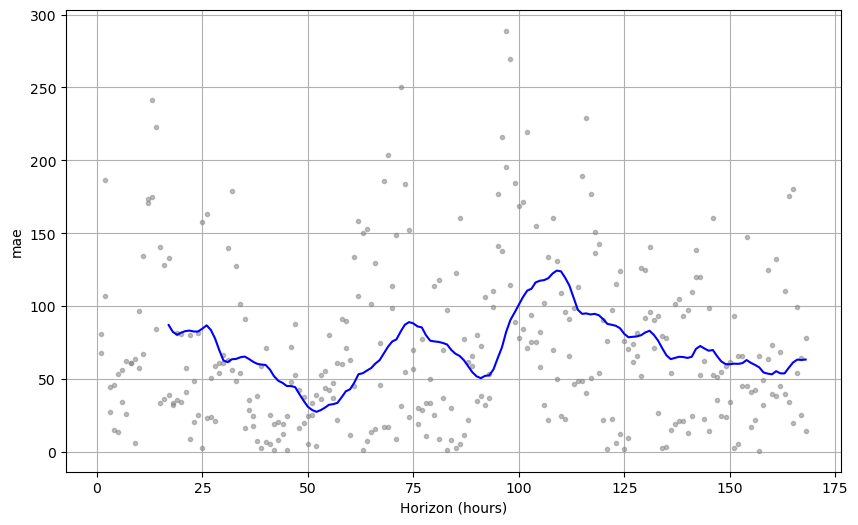

In [156]:
from fbprophet.plot import plot_cross_validation_metric

fig7 = plot_cross_validation_metric(df_cv, metric='mae')

### Hyperparameter tuning 

In [157]:
from itertools import product

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

maes = []

for params in all_params:
    m = Prophet(**params).fit(train)
    df_cv = cross_validation(m, initial='504 hours', period='84 hours', horizon='168 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])
    
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes

tuning_results

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2007-01-09 21:00:00 and 2007-01-13 09:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000261AF239548>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2007-01-09 21:00:00 and 2007-01-13 09:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000261AFF56A08>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2007-01-09 21:00:00 and 2007-01-13 09:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000261B04635C8>
INFO:fbprophet:Disabling yearly se

,changepoint_prior_scale,seasonality_prior_scale,mae
0,0.001,0.01,54.609908
1,0.001,0.10,53.013448
2,0.001,1.00,53.239048
3,0.001,10.00,53.348808
4,0.010,0.01,56.381087
5,0.010,0.10,54.928796
6,0.010,1.00,54.508133
7,0.010,10.00,55.907790
8,0.100,0.01,66.437015
9,0.100,0.10,68.167155


In [158]:
best_params = all_params[np.argmin(maes)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}
